#**Phase 1 Milestone Assignment**

##**Identity**

Ihsan Aulia Rahman

Full Time Data Science

HCK-Batch-001

#**A. Description**

##**A. 1. Problem Statement**

We are given a dataset of Uber and Lyft ridesharing data containing observations of rideshare orders. We want to create a machine learning algorithm/model based on the dataset to predict  the price of a ride based on other variables.

##**A.2. Objective**

We are going to build this prediction model of the price of an Uber or Lyft ride using linear regression algorithm from Scikit framework.

#**B. Libraries**

Here we import the necessary function libraries for this assignment.

##**B.1. Exploratory Functions**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create histogram and box plots of a column
def plot_hist_box(df, variable):
  plt.figure(figsize=(16, 4))
  plt.subplot(1, 2, 1)
  sns.histplot(df[variable], bins=40)
  plt.title('Histogram')
  plt.subplot(1, 2, 2)
  sns.boxplot(y=df[variable])
  plt.title('Boxplot')
  plt.show()

# Return upper and lower boundary values if a column 
def boundaries(df, variable, multiplier):
  IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)
  lower_boundary = df[variable].quantile(0.25) - (IQR * multiplier)
  upper_boundary = df[variable].quantile(0.75) + (IQR * multiplier)
  return upper_boundary, lower_boundary

# Return outlier statistics of  a column
def outliers(df, variable, multiplier, upper_boundary, lower_boundary):
  print('Number of data : {}'.format(len(df)))
  print('Upper Outlier  : {}'.format(len(df[df[variable] > upper_boundary])))
  print('Lower Outlier  : {}'.format(len(df[df[variable] > lower_boundary])))
  print('Total Outlier  : {}'.format(len(df[(df[variable] > upper_boundary) or (df[variable] > lower_boundary)])))
  print('% outlier : {} %'.format(len(df[(df[variable] > upper_boundary) or (df[variable] > lower_boundary)]) / len(df) * 100))

# Calculate Variance Inflation Factor
def calc_vif(X):
  vif = pd.DataFrame()
  vif["variables"] = X.columns
  vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
  return(vif)

##**B.2. Modelling Functions**

In [2]:
# Split and Standarize Datasets
!pip install feature-engine

from feature_engine.outliers import Winsorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import OrdinalEncoder

# Regression Models
from sklearn.linear_model import LinearRegression

# Evaluate Regression Models
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score

# Save Model Files
import joblib 
import json 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 276 kB 6.9 MB/s 


#**C. Loading and EDA**

##**C.1. Data Loading**

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Week 1/GA 1/rideshare_kaggle.csv')

##**C.2. Exploratory Data Analysis**

###**C.2.1. Initial Exploration**

In [4]:
pd.set_option("display.max.columns", None)
df.head(5)

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,42.2148,-71.033,42.34,37.12,Mostly Cloudy,Rain throughout the day.,0.0000,0.0,0.68,8.66,9.17,1545015600,10.000,43.68,1544968800,34.19,1545048000,37.95,1544968800,27.39,1545044400,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.000,303.8,1544962084,1544994864,0.30,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,42.2148,-71.033,43.58,37.35,Rain,"Rain until morning, starting again in the eve...",0.1299,1.0,0.94,11.98,11.98,1543291200,4.786,47.30,1543251600,42.10,1543298400,43.92,1543251600,36.20,1543291200,rain,41.83,1003.97,90,1.00,0,4.786,291.1,1543232969,1543266992,0.64,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,1.0,42.2148,-71.033,38.33,32.93,Clear,Light rain in the morning.,0.0000,0.0,0.75,7.33,7.33,1543334400,10.000,47.55,1543320000,33.10,1543402800,44.12,1543320000,29.11,1543392000,clear-night,31.10,992.28,240,0.03,0,10.000,315.7,1543319437,1543353364,0.68,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.44,1.0,42.2148,-71.033,34.38,29.63,Clear,Partly cloudy throughout the day.,0.0000,0.0,0.73,5.28,5.28,1543514400,10.000,45.03,1543510800,28.90,1543579200,38.53,1543510800,26.20,1543575600,clear-night,26.64,1013.73,310,0.00,0,10.000,291.1,1543492370,1543526114,0.75,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,0.44,1.0,42.2148,-71.033,37.44,30.88,Partly Cloudy,Mostly cloudy throughout the day.,0.0000,0.0,0.70,9.14,9.14,1543446000,10.000,42.18,1543420800,36.71,1543478400,35.75,1543420800,30.29,1543460400,partly-cloudy-night,28.61,998.36,303,0.44,0,10.000,347.7,1543405904,1543439738,0.72,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

In [ ]:
df.isna().sum()

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

In [ ]:
df.shape

(693071, 57)

In [ ]:
cat_columns = df.select_dtypes(include=['object']).columns.tolist()
num_columns = df.select_dtypes(include=np.number).columns.tolist() 
print(cat_columns)
print('There are {} categorical variables' .format(len(cat_columns)))

['id', 'datetime', 'timezone', 'source', 'destination', 'cab_type', 'product_id', 'name', 'short_summary', 'long_summary', 'icon']
There are 11 categorical variables


The dataframe has 693071 observations with 57 variables. 11 of them are categorical and 46 of them are numerical. The variable we're using as a prediction target is the column `price`. 

Unfortunately, there are many missing values on that column and that column only. This is bad, but also largely good. Because we can just drop observations with missing values on column `price` without consequences to train/test data and there will be no more missing values in the dataset.

In [5]:
ride = df.copy()
ride.dropna(axis=0, inplace = True)

Now we have a cleaned up dataframe.

###**C.2.2. Multicolinearity Test**

57 Columns is way too many for our model to handle. One reason is that it would take too much of computing time to consider all variables. Another is that too many variables can lead to model overfitting. That is, instead of creating a generalized prediction algorithm, the model creates a highly specific prediction algorithm that will be highly inaccurate outside the training data.

Therefore, we want to eliminate as much of unnecessary variables as possible. But which one? For example let there be two categorical variables, that one is actual names and the other is the id of the names. Either one of those variables won't be very helpful for our model because both are basically the same thing. This is called colinearity, and it can happen between more than two variables, hence, multicolinearity. We want to eliminate variables that have high multicolinearity within the dataset.

In [ ]:
Correlations = ride[num_columns]
vif_table = calc_vif(Correlations)
# this cell took like 12 minutes alone. Please refer to table below instead of re-running it.

In [ ]:
vif_table[vif_table['VIF']<=10]

,variables,VIF
1,hour,6.222732
4,price,1.208808
5,distance,1.139914
6,surge_multiplier,1.065698
7,latitude,6.511428
8,longitude,2.347308
11,precipIntensity,5.208862
12,precipProbability,6.961462
28,windBearing,3.535974
29,cloudCover,2.672954


Now that we have the columns with low multicolinearity, we will drop the other numerical columns.

In [ ]:
# num_columns_1 = vif_table[vif_table['VIF']<=10]['variables'].tolist()
num_columns_1 = ['hour', 
                 'price', 
                 'distance',	
                 'surge_multiplier',	
                 'latitude',	
                 'longitude',	
                 'precipIntensity',	
                 'precipProbability',	
                 'windBearing',	
                 'cloudCover',	
                 'uvIndex']

###**C.2.3. Autocorrelation Test**

Other than multicolinearity, we also concern if the variables autocorrelate. If the variable is time-variant, it's values could influenced by the previous value and this self-influence can affect the predictive algorithm. We want to eliminate autocorrelative variables within the dataset.

We can test for autocorrelation using Durbin-Watson test.

<img src='https://www.researchgate.net/profile/Sc-Thushara/post/How-to-choose-significance-level-for-Durbin-Watson-Statistics/attachment/5a52bbd6b53d2f0bba499b3b/AS%3A580324195553280%401515371478750/image/DW.jpg'>

In [ ]:
X = ride.loc[:,num_columns_1]
X.drop(['price'], axis=1, inplace=True)

Y = ride['price']

In [ ]:
feature = sm.add_constant(X)
mod = sm.OLS(Y, feature)
result = mod.fit()
print(result.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.173
Model:                            OLS   Adj. R-squared:                  0.173
Method:                 Least Squares   F-statistic:                 1.332e+04
Date:                Sun, 11 Sep 2022   Prob (F-statistic):               0.00
Time:                        11:45:06   Log-Likelihood:            -2.2691e+06
No. Observations:              637976   AIC:                         4.538e+06
Df Residuals:                  637965   BIC:                         4.538e+06
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -30.9475     39.46

Fortunately, the Durbin-Watson value returns value close to 2, so we don't have to take further action

###**C.2.4. Redundant Categorical Columns**

Just as numerical variables can be multicolinear, categorical variables can be redundant. let's take a look

In [ ]:
ride_cat = ride.loc[:,cat_columns]
ride_cat.sample(5)

,id,datetime,timezone,source,destination,cab_type,product_id,name,short_summary,long_summary,icon
142947,e02b1d1d-e938-41f5-b8d2-8fd77e66f829,2018-12-02 10:17:58,America/New_York,Boston University,West End,Lyft,lyft,Lyft,Light Rain,Light rain until evening.,rain
355414,0a424f42-1e1e-4d65-8442-57b21d960f5f,2018-12-15 05:05:11,America/New_York,North End,Financial District,Lyft,lyft_plus,Lyft XL,Overcast,Mostly cloudy throughout the day.,cloudy
641375,e9579f0f-ee24-4f64-8dcf-4bf9a74c5488,2018-12-03 07:58:00,America/New_York,South Station,Financial District,Uber,6c84fd89-3f11-4782-9b50-97c468b19529,Black,Overcast,Foggy in the morning.,cloudy
157855,35a21804-2268-4986-bfd0-4a92f2d3939b,2018-12-14 16:55:04,America/New_York,West End,Haymarket Square,Lyft,lyft_plus,Lyft XL,Clear,Partly cloudy throughout the day.,clear-day
278090,769eaecd-d8be-46c5-81d1-c95f75602450,2018-12-16 19:20:13,America/New_York,West End,North End,Lyft,lyft_lux,Lux Black,Overcast,Rain throughout the day.,cloudy


In [ ]:
ride.timezone.unique()

array(['America/New_York'], dtype=object)

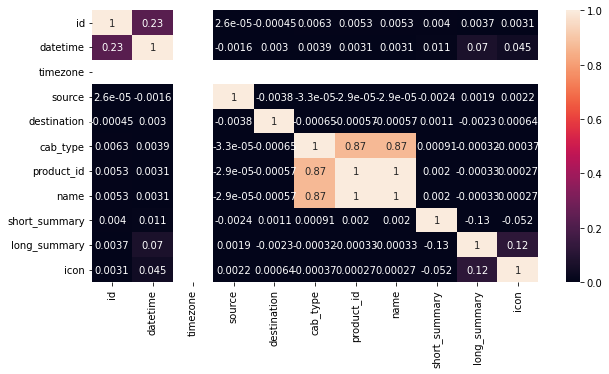

In [ ]:
cat_corr = ride_cat.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)
plt.figure(figsize=(10, 5))
sns.heatmap(cat_corr, annot= True, vmin=0, vmax=1)
plt.show()

In [ ]:
print('Elements in column `product_id`: {}' .format(ride['product_id'].nunique()))
print('Elements in column `name`      : {}' .format(ride['name'].nunique()))

Elements in column `product_id`: 12
Elements in column `name`      : 12


The Column `timezone` only has 1 type of values, so we will drop it. 

Columns `product_id` and `name` are exactly the same. Both refers to type of service provided just in different names, so they are redundant. We can eliminate either one of them.

However, there's also high correlation between `cab_type` and `product_id`. This is because every services (`product_id`) only exist in respective companies (`cab_type`). We are going to drop `cab_type` for this, because a change in `cab_type` definitely means a change in `product_id`.

In [ ]:
cat_columns_1 = ['id', 
                 'datetime',  
                 'source', 
                 'destination', 
                 'product_id', 
                 'short_summary', 
                 'long_summary', 
                 'icon']

#**D. Preprocessing**

We now have completed the EDA to know what we have to do with the data before modelling. Now let's dive right in.

##**D.1. Inference Data**

Before anything, let's take a small sample from the dataset to be inferred later with our finished model.

In [6]:
ride_inf = ride.sample(10, random_state=11092001)
ride_inf.reset_index(drop=True, inplace=True)

ride_train_test = ride.drop(ride_inf.index)
ride_train_test.reset_index(drop=True, inplace=True)

##**D.2. Feature Selection**

We have eliminated many variables on EDA, but we still need to consider which ones are actually crucial to create the best model. Take it as semifinal round where we further eliminate more columns before applying it into the dataset.

In [ ]:
ride.short_summary.unique().tolist()

[' Mostly Cloudy ',
 ' Rain ',
 ' Clear ',
 ' Partly Cloudy ',
 ' Overcast ',
 ' Light Rain ',
 ' Foggy ',
 ' Possible Drizzle ',
 ' Drizzle ']

In [ ]:
ride.long_summary.unique().tolist()

[' Rain throughout the day. ',
 ' Rain until morning, starting again in the evening. ',
 ' Light rain in the morning. ',
 ' Partly cloudy throughout the day. ',
 ' Mostly cloudy throughout the day. ',
 ' Light rain in the morning and overnight. ',
 ' Light rain until evening. ',
 ' Foggy in the morning. ',
 ' Overcast throughout the day. ',
 ' Possible drizzle in the morning. ',
 ' Rain in the morning and afternoon. ']

In [ ]:
ride.icon.unique().tolist()

[' partly-cloudy-night ',
 ' rain ',
 ' clear-night ',
 ' cloudy ',
 ' fog ',
 ' clear-day ',
 ' partly-cloudy-day ']

In [ ]:
print(num_columns_1)
print(cat_columns_1)

['hour', 'price', 'distance', 'surge_multiplier', 'latitude', 'longitude', 'precipIntensity', 'precipProbability', 'windBearing', 'cloudCover', 'uvIndex']
['id', 'datetime', 'source', 'destination', 'product_id', 'short_summary', 'long_summary', 'icon']


We're going to drop the columns `id` and `datetime` since `price` does not depend on it, and also `short_summany`, `long_summary` and `icon` because they only represent the weather columns on numerical variables.

In [7]:
num_columns_1 = ['hour', 'distance', 'surge_multiplier', 'latitude', 'longitude', 'precipIntensity', 'precipProbability', 'windBearing', 'cloudCover', 'uvIndex']
cat_columns_1 = ['source', 'destination', 'product_id']

##**D.3. Feature Engineering**

###**D.3.1. Data Splitting**

####D.3.1.1 X-Y Splitting

We have selected the features we need. Now it's time to separate the target column...

In [8]:
X = ride_train_test.drop('price', axis=1) 
Y = ride_train_test['price']

####D.3.1.1 Train-Test Splitting

...And then split the data for training and testing.

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=11092001)

print('Train Size : ', X_train.shape)
print('Test Size  : ', X_test.shape)

Train Size :  (510372, 56)
Test Size  :  (127594, 56)


###**D.3.2. Outlier Handling**

Let's pull the statistics for numerical columns. We are going to see if there are outliers and/or the need to handle them.

In [ ]:
num_columns_1

['hour',
 'distance',
 'surge_multiplier',
 'latitude',
 'longitude',
 'precipIntensity',
 'precipProbability',
 'windBearing',
 'cloudCover',
 'uvIndex']

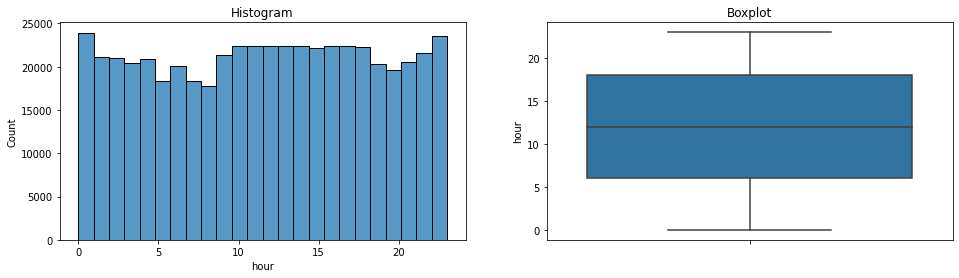

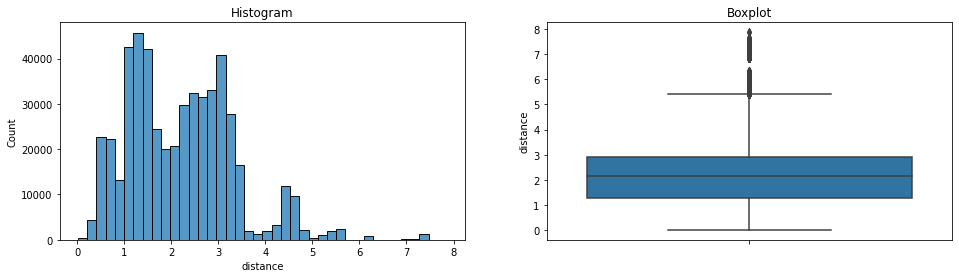

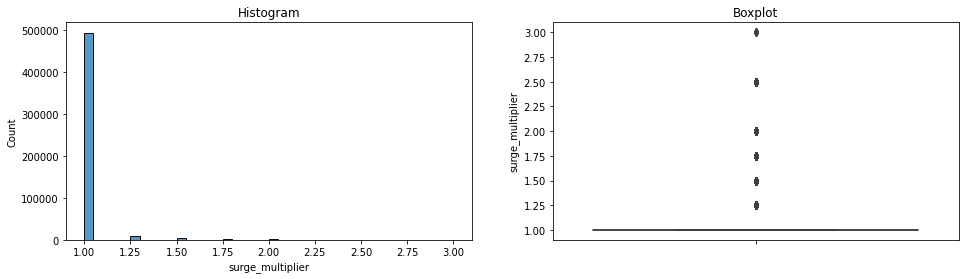

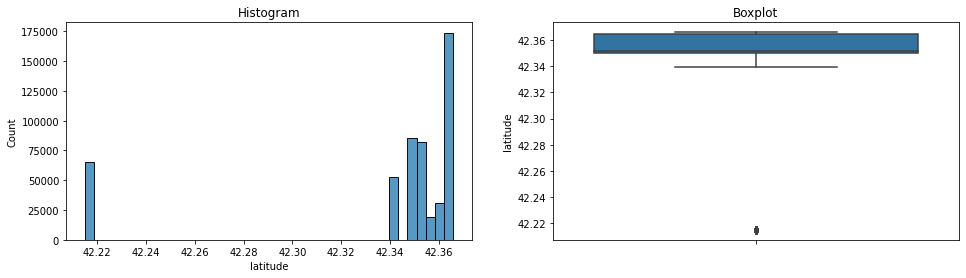

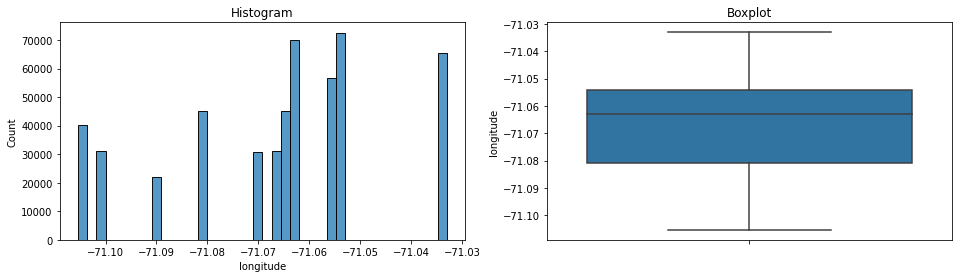

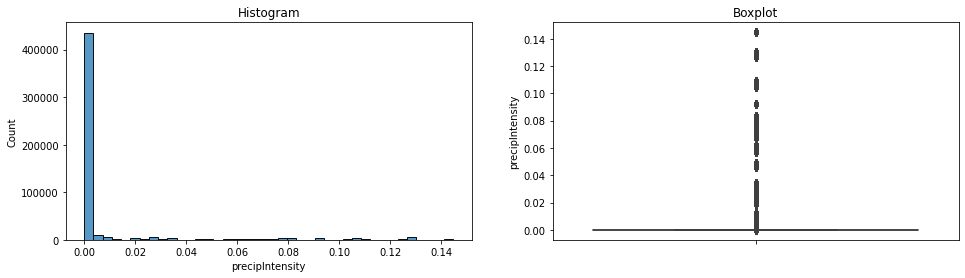

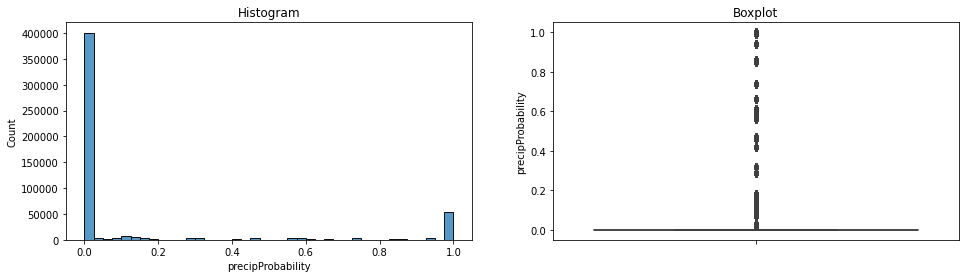

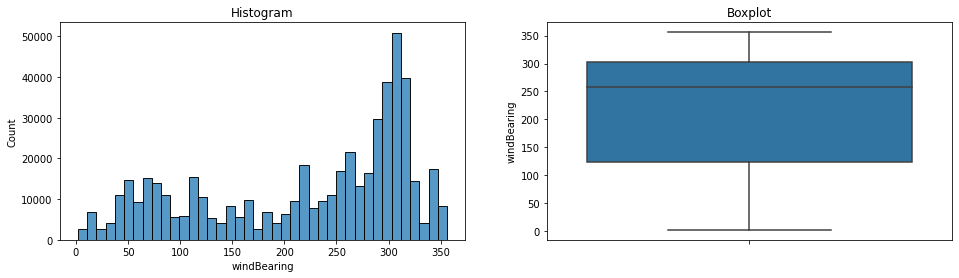

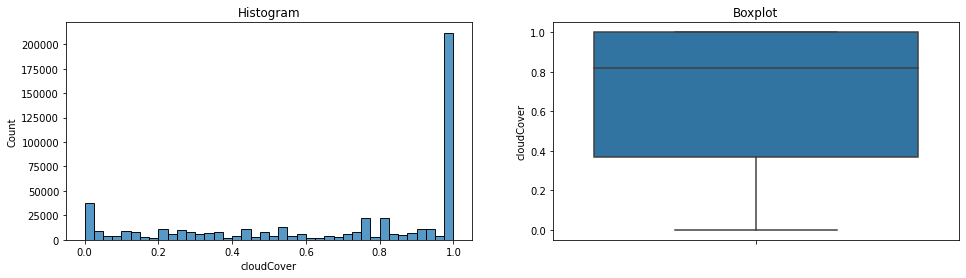

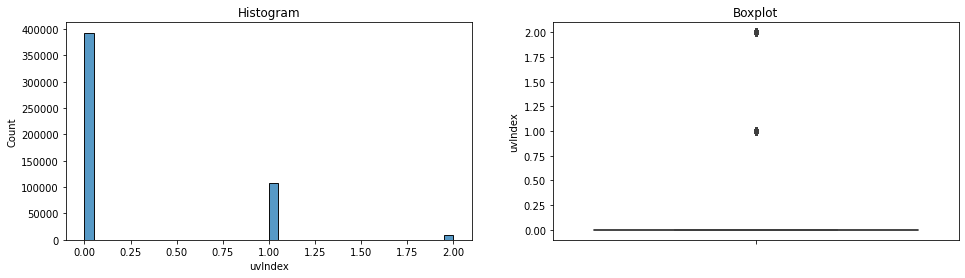

In [14]:
plt.figure(figsize=(16, 4))
plt.subplot(1, 2, 1)
sns.histplot(X_train['hour'], bins=24)
plt.title('Histogram')
plt.subplot(1, 2, 2)
sns.boxplot(y=X_train['hour'])
plt.title('Boxplot')
plt.show()

plot_hist_box(X_train,'distance')
plot_hist_box(X_train,'surge_multiplier')
plot_hist_box(X_train,'latitude')
plot_hist_box(X_train,'longitude')
plot_hist_box(X_train,'precipIntensity')
plot_hist_box(X_train,'precipProbability')
plot_hist_box(X_train,'windBearing')
plot_hist_box(X_train,'cloudCover')
plot_hist_box(X_train,'uvIndex')

There are few variables with outliers. We are going to cap the columns `distance`, `precipIntensity` and `precipProbability` with winsorization and left the others such as `surge_multiplier` and `uvindex` because from the distribution they seem to be discreet data.

In [16]:
X_train_winsor = X_train[['distance', 'precipIntensity', 'precipProbability']]

windsoriser = Winsorizer(capping_method='iqr', tail='both', fold=1.5, variables=['distance', 'precipIntensity', 'precipProbability'])

windsoriser.fit(X_train_winsor)

X_train_capped = windsoriser.transform(X_train_winsor)

In [54]:
X_train1 = X_train.copy()
X_train1.drop(columns=['distance', 'precipIntensity', 'precipProbability'], inplace=True)
X_train1 = pd.concat([X_train1, X_train_capped], axis=1)

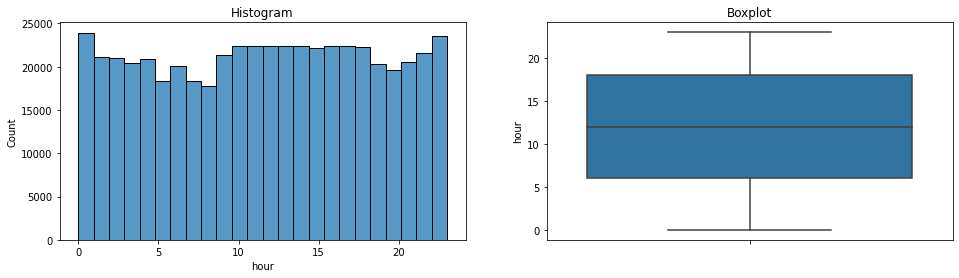

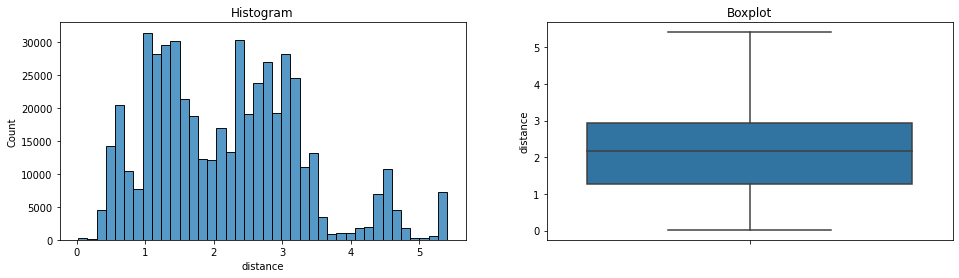

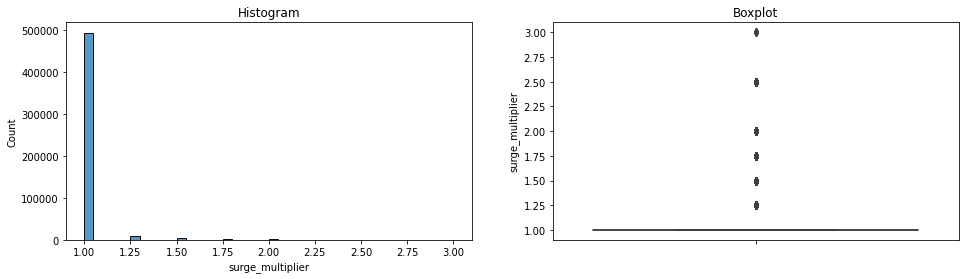

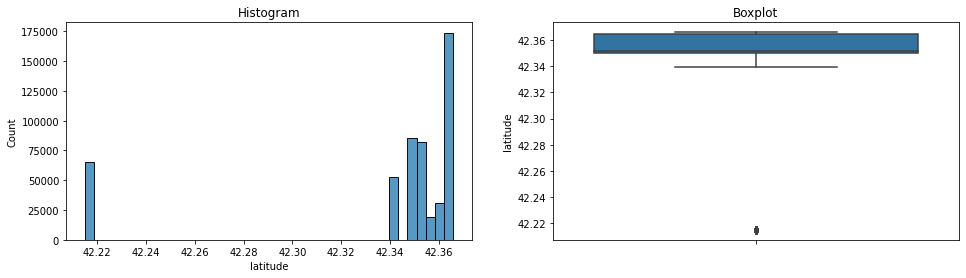

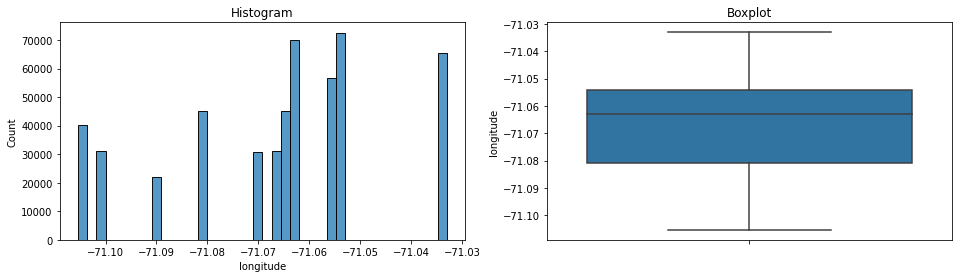

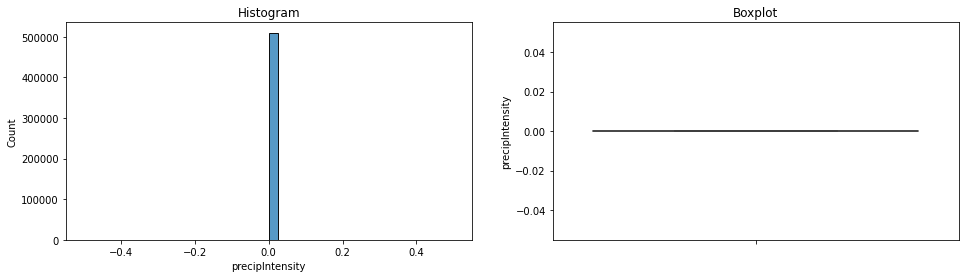

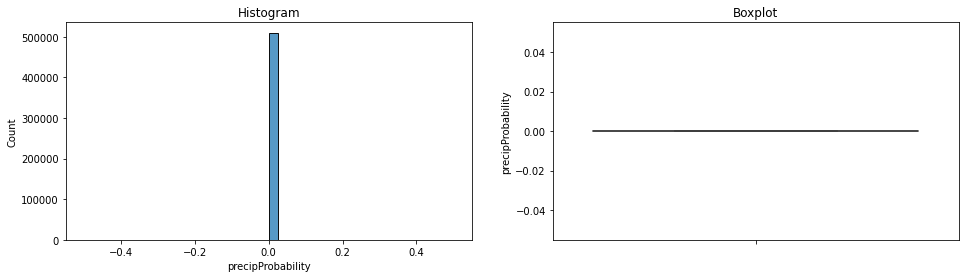

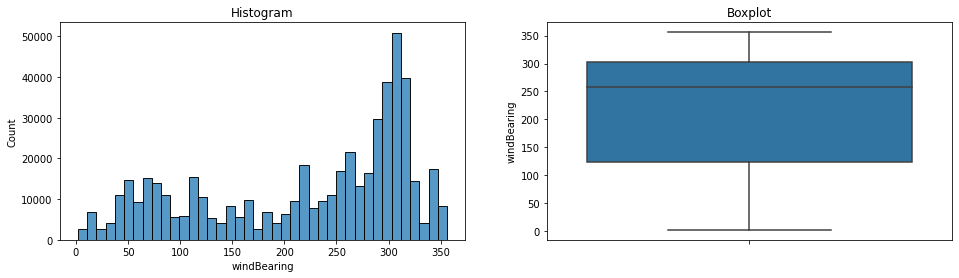

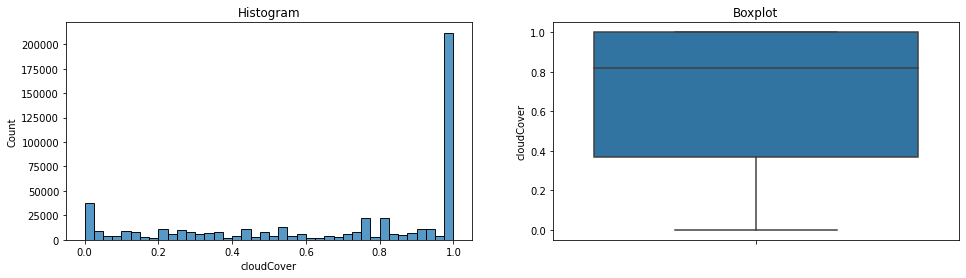

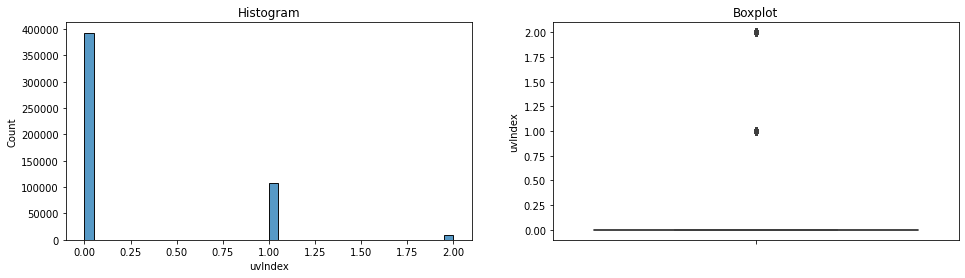

In [55]:
plt.figure(figsize=(16, 4))
plt.subplot(1, 2, 1)
sns.histplot(X_train1['hour'], bins=24)
plt.title('Histogram')
plt.subplot(1, 2, 2)
sns.boxplot(y=X_train1['hour'])
plt.title('Boxplot')
plt.show()

plot_hist_box(X_train1,'distance')
plot_hist_box(X_train1,'surge_multiplier')
plot_hist_box(X_train1,'latitude')
plot_hist_box(X_train1,'longitude')
plot_hist_box(X_train1,'precipIntensity')
plot_hist_box(X_train1,'precipProbability')
plot_hist_box(X_train1,'windBearing')
plot_hist_box(X_train1,'cloudCover')
plot_hist_box(X_train1,'uvIndex')

It seems capping left the columns `precipIntensity` and `precipProbability` as single varaible data instead. Let's create three different predictive models based on the unaltered, capped and dropped data to see which one is better.

In [56]:
X_train2 = X_train1.copy()
X_train2.drop(columns=['precipIntensity', 'precipProbability'], inplace=True)

In [57]:
num_columns_2 = ['hour',
                 'distance',
                 'surge_multiplier',
                 'latitude',
                 'longitude',
                 'windBearing',
                 'cloudCover',
                 'uvIndex']

###**D.3.3. Scaling and Encoding**

####D.3.3.1. Numerical-Categorical Splitting

Before we begin, we split the train and test data into numerical and categorical columns.

In [60]:
X_train_num = X_train[num_columns_1]
X_train_num1 = X_train1[num_columns_1]
X_train_num2 = X_train2[num_columns_2]
X_train_cat = X_train[cat_columns_1]

X_test_num = X_test[num_columns_1]
X_test_num1 = X_test[num_columns_1]
X_test_num2 = X_test[num_columns_2]
X_test_cat = X_test[cat_columns_1]

####D.3.3.2. Numerical Scaling

For numerical columns, we fit a Min-Max Scaler onto them to simplify the modelling process. The scaler converts highest data into 1 and lowest into 0.

In [68]:
scaler = MinMaxScaler()
scaler1 = MinMaxScaler()
scaler2 = MinMaxScaler()

scaler.fit(X_train_num)
scaler1.fit(X_train_num1)
scaler2.fit(X_train_num2)

X_train_num_scaled = scaler.transform(X_train_num)
X_train_num_scaled1 = scaler1.transform(X_train_num1)
X_train_num_scaled2 = scaler2.transform(X_train_num2)

X_test_num_scaled = scaler.transform(X_test_num)
X_test_num_scaled1 = scaler1.transform(X_test_num1)
X_test_num_scaled2 = scaler2.transform(X_test_num2)

####D.3.3.3. Category Encoding

For categorical columns, we fit an Ordinal Scaler onto them to simplify the modelling process. The scaler converts each unique values into a number.

In [62]:
X_train_cat.head(5)

,source,destination,product_id
433762,North End,Beacon Hill,lyft
190207,South Station,Beacon Hill,6d318bcc-22a3-4af6-bddd-b409bfce1546
369420,Theatre District,Fenway,6c84fd89-3f11-4782-9b50-97c468b19529
306610,North End,West End,6f72dfc5-27f1-42e8-84db-ccc7a75f6969
599189,Theatre District,Fenway,lyft_lux


In [63]:
encoder = OrdinalEncoder(categories=[X_train_cat.source.unique().tolist(),
                                     X_train_cat.destination.unique().tolist(),
                                     X_train_cat.product_id.unique().tolist()])
encoder.fit(X_train_cat)

X_train_cat_encoded = encoder.transform(X_train_cat)
X_test_cat_encoded = encoder.transform(X_test_cat)
X_train_cat_encoded

array([[ 0.,  0.,  0.],
       [ 1.,  0.,  1.],
       [ 2.,  1.,  2.],
       ...,
       [ 8.,  9., 10.],
       [ 7., 10.,  0.],
       [ 8., 11.,  4.]])

####D.3.3.4. Numerical-Categorical Joining

After we've finished scaling and encoding the variables, it's only a matter of joining them back together.

In [69]:
X_train_final = np.concatenate([X_train_num_scaled, X_train_cat_encoded], axis=1)
X_train_final_df = pd.DataFrame(X_train_final, columns=[num_columns_1+cat_columns_1])

X_train_final1 = np.concatenate([X_train_num_scaled1, X_train_cat_encoded], axis=1)
X_train_final_df1 = pd.DataFrame(X_train_final1, columns=[num_columns_1+cat_columns_1])

X_train_final2 = np.concatenate([X_train_num_scaled2, X_train_cat_encoded], axis=1)
X_train_final_df2 = pd.DataFrame(X_train_final2, columns=[num_columns_2+cat_columns_1])

X_test_final = np.concatenate([X_test_num_scaled, X_test_cat_encoded], axis=1)
X_test_final_df = pd.DataFrame(X_test_final, columns=[num_columns_1+cat_columns_1])

X_test_final1 = np.concatenate([X_test_num_scaled1, X_test_cat_encoded], axis=1)
X_test_final_df1 = pd.DataFrame(X_test_final1, columns=[num_columns_1+cat_columns_1])

X_test_final2 = np.concatenate([X_test_num_scaled2, X_test_cat_encoded], axis=1)
X_test_final_df2 = pd.DataFrame(X_test_final2, columns=[num_columns_2+cat_columns_1])

#**E. Modelling**

Now it's time to model the machine learning algorithm.

##**E.1. Definition**

First, we define the model to use linear regression algorithm. this algorithm, in a sense, placed every variables on a "zero" hyperplane and then calculate another hyperplane on some distance and orientation from the former. The distance between the two hyperplanes is the algorithm's prediction of the target variable.

In [70]:
model = LinearRegression()
model1 = LinearRegression()
model2 = LinearRegression()

##**E.2. Training**

Next, we train the model on the training data.

In [71]:
model.fit(X_train_final, Y_train)
model1.fit(X_train_final1, Y_train)
model2.fit(X_train_final2, Y_train)

LinearRegression()

##**E.3. Evaluation**

After that, we tell it to predict the target variables of train and test data. The predicted values are then compared to the actual values.

In [73]:
Y_pred_train = model.predict(X_train_final)
Y_pred_train1 = model1.predict(X_train_final1)
Y_pred_train2 = model2.predict(X_train_final2)

Y_pred_test = model.predict(X_test_final)
Y_pred_test1 = model.predict(X_test_final1)
Y_pred_test2 = model2.predict(X_test_final2)

In [76]:
print('Model accuracy - Train Set : ', (1-(r2_score(Y_train, Y_pred_train)))*100,' %')
print('Model accuracy - Test Set  : ', (1-(r2_score(Y_test, Y_pred_test)))*100,' %')
print()
print('Model1 accuracy - Train Set : ', (1-(r2_score(Y_train, Y_pred_train1)))*100,' %')
print('Model1 accuracy - Test Set  : ', (1-(r2_score(Y_test, Y_pred_test1)))*100,' %')
print()
print('Model2 accuracy - Train Set : ', (1-(r2_score(Y_train, Y_pred_train2)))*100,' %')
print('Model2 accuracy - Test Set  : ', (1-(r2_score(Y_test, Y_pred_test2)))*100,' %')

Model accuracy - Train Set :  80.60736236243706  %
Model accuracy - Test Set  :  80.85333767902355  %

Model1 accuracy - Train Set :  80.54197933853645  %
Model1 accuracy - Test Set  :  92.16829632902605  %

Model2 accuracy - Train Set :  80.54197933853645  %
Model2 accuracy - Test Set  :  80.8690688172405  %


Using R-Square grading, all model scored around 80% on both training and test data, except on Model1 (capped data) where it scored 92% on the test set. Good scores in both datasets confirm that the model is neither underfitted nor overfitted. We are going to use Model1 for our inferencing.

#**F. Inferencing**

Lastly, let's try to use the model to infer some predictions.

##**F.1. Load Inference Data**

In [77]:
ride_inf

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,92d9558a-f338-4b52-8280-31ea3e4ea327,1.543408e+09,12,28,11,2018-11-28 12:26:07,America/New_York,West End,Fenway,Lyft,lyft,Lyft,9.0,2.93,1.0,42.3588,-71.0707,36.53,32.06,Mostly Cloudy,Mostly cloudy throughout the day.,0.0000,0.00,0.71,5.42,6.95,1543431600,9.974,42.61,1543438800,37.64,1543485600,36.60,1543438800,32.23,1543478400,partly-cloudy-day,28.14,991.36,261,0.54,0,9.974,347.5,1543405939,1543439721,0.72,0.0000,1543420800,33.83,1543399200,42.61,1543438800,30.13,1543399200,36.60,1543438800
1,32b428de-1048-43ce-84a2-f7e9f0224cb1,1.543753e+09,12,2,12,2018-12-02 12:17:58,America/New_York,Northeastern University,Theatre District,Uber,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,9.5,1.94,1.0,42.3503,-71.0810,41.19,36.49,Light Rain,Light rain until evening.,0.0923,1.00,0.92,7.16,7.16,1543755600,4.661,50.80,1543788000,44.97,1543816800,50.13,1543788000,45.62,1543816800,rain,39.06,1017.35,109,1.00,0,4.661,273.9,1543751798,1543785242,0.86,0.0916,1543770000,36.32,1543726800,50.80,1543788000,35.84,1543748400,50.13,1543788000
2,681f3399-5300-478b-ab1d-98210d6229a2,1.543350e+09,20,27,11,2018-11-27 20:24:23,America/New_York,South Station,Back Bay,Lyft,lyft_plus,Lyft XL,16.5,2.08,1.0,42.3647,-71.0542,43.02,37.56,Mostly Cloudy,Light rain in the morning.,0.0000,0.00,0.69,9.55,11.74,1543338000,10.000,47.11,1543320000,33.85,1543399200,44.14,1543320000,30.03,1543399200,partly-cloudy-day,33.71,991.00,256,0.82,0,10.000,311.4,1543319468,1543353343,0.68,0.1430,1543338000,36.34,1543377600,47.11,1543320000,32.26,1543377600,44.14,1543320000
3,45b7ee59-d807-4201-8cf9-ed95e990d097,1.543398e+09,9,28,11,2018-11-28 09:32:18,America/New_York,Haymarket Square,West End,Lyft,lyft_lux,Lux Black,16.5,0.64,1.0,42.3429,-71.1003,34.26,30.15,Partly Cloudy,Mostly cloudy throughout the day.,0.0000,0.00,0.79,4.54,7.00,1543431600,9.924,42.70,1543438800,37.17,1543464000,36.77,1543438800,31.87,1543460400,partly-cloudy-night,28.36,991.12,252,0.25,0,9.924,343.8,1543405943,1543439731,0.72,0.0000,1543420800,33.60,1543399200,42.70,1543438800,30.08,1543399200,36.77,1543438800
4,846cb6b7-9c81-4149-8d3f-9c6d8b752c9f,1.543252e+09,17,26,11,2018-11-26 17:11:09,America/New_York,Theatre District,North End,Lyft,lyft,Lyft,9.0,1.69,1.0,42.3661,-71.0631,45.83,43.88,Overcast,"Rain until morning, starting again in the eve...",0.0010,0.12,0.88,4.22,5.17,1543287600,8.104,46.49,1543255200,41.90,1543298400,43.84,1543244400,36.70,1543298400,cloudy,42.51,1012.59,114,1.00,1,8.104,294.0,1543233003,1543266973,0.64,0.1225,1543251600,40.45,1543233600,46.49,1543255200,37.17,1543291200,43.84,1543244400
5,4d9057a1-fcb2-4af1-8a0c-3cb387c2efff,1.543692e+09,19,1,12,2018-12-01 19:23:01,America/New_York,Haymarket Square,Theatre District,Lyft,lyft_lux,Lux Black,19.5,1.87,1.0,42.3661,-71.0631,43.99,43.99,Partly Cloudy,Light rain in the morning and overnight.,0.0000,0.00,0.52,2.13,3.27,1543672800,9.815,44.72,1543690800,34.90,1543712400,44.05,1543690800,35.55,1543712400,partly-cloudy-day,27.51,1022.41,121,0.42,1,9.815,273.9,1543665333,1543698853,0.82,0.0000,1543683600,31.55,1543658400,44.72,1543690800,27.95,1543658400,44.05,1543690800
6,a40f1e2d-850d-4f3a-941b-13d522903cd3,1.543716e+09,2,2,12,2018-12-02 02:07:58,America/New_York,Theatre District,Fenway,Uber,55c66225

##**F.2. Scaling and Encoding**

In [78]:
data_inf_num = ride_inf[num_columns_1]
data_inf_cat = ride_inf[cat_columns_1]
data_inf = ride_inf.drop('price', axis=1)

In [79]:
data_inf_num_scaled = scaler1.transform(data_inf_num)
data_inf_cat_encoded = encoder.transform(data_inf_cat)

In [80]:
data_inf_final = np.concatenate([data_inf_num_scaled, data_inf_cat_encoded], axis=1)
data_inf_final = pd.DataFrame(data_inf_final, columns=[num_columns_1+cat_columns_1])

##**F.3. Predicting**

In [82]:
y_pred_inf = model1.predict(data_inf_final)
y_pred_inf_df = pd.DataFrame(y_pred_inf, columns=['Price - Prediction'])
pd.concat([data_inf, y_pred_inf_df], axis=1)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime,Price - Prediction
0,92d9558a-f338-4b52-8280-31ea3e4ea327,1.543408e+09,12,28,11,2018-11-28 12:26:07,America/New_York,West End,Fenway,Lyft,lyft,Lyft,2.93,1.0,42.3588,-71.0707,36.53,32.06,Mostly Cloudy,Mostly cloudy throughout the day.,0.0000,0.00,0.71,5.42,6.95,1543431600,9.974,42.61,1543438800,37.64,1543485600,36.60,1543438800,32.23,1543478400,partly-cloudy-day,28.14,991.36,261,0.54,0,9.974,347.5,1543405939,1543439721,0.72,0.0000,1543420800,33.83,1543399200,42.61,1543438800,30.13,1543399200,36.60,1543438800,20.382042
1,32b428de-1048-43ce-84a2-f7e9f0224cb1,1.543753e+09,12,2,12,2018-12-02 12:17:58,America/New_York,Northeastern University,Theatre District,Uber,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,1.94,1.0,42.3503,-71.0810,41.19,36.49,Light Rain,Light rain until evening.,0.0923,1.00,0.92,7.16,7.16,1543755600,4.661,50.80,1543788000,44.97,1543816800,50.13,1543788000,45.62,1543816800,rain,39.06,1017.35,109,1.00,0,4.661,273.9,1543751798,1543785242,0.86,0.0916,1543770000,36.32,1543726800,50.80,1543788000,35.84,1543748400,50.13,1543788000,14.235030
2,681f3399-5300-478b-ab1d-98210d6229a2,1.543350e+09,20,27,11,2018-11-27 20:24:23,America/New_York,South Station,Back Bay,Lyft,lyft_plus,Lyft XL,2.08,1.0,42.3647,-71.0542,43.02,37.56,Mostly Cloudy,Light rain in the morning.,0.0000,0.00,0.69,9.55,11.74,1543338000,10.000,47.11,1543320000,33.85,1543399200,44.14,1543320000,30.03,1543399200,partly-cloudy-day,33.71,991.00,256,0.82,0,10.000,311.4,1543319468,1543353343,0.68,0.1430,1543338000,36.34,1543377600,47.11,1543320000,32.26,1543377600,44.14,1543320000,13.935749
3,45b7ee59-d807-4201-8cf9-ed95e990d097,1.543398e+09,9,28,11,2018-11-28 09:32:18,America/New_York,Haymarket Square,West End,Lyft,lyft_lux,Lux Black,0.64,1.0,42.3429,-71.1003,34.26,30.15,Partly Cloudy,Mostly cloudy throughout the day.,0.0000,0.00,0.79,4.54,7.00,1543431600,9.924,42.70,1543438800,37.17,1543464000,36.77,1543438800,31.87,1543460400,partly-cloudy-night,28.36,991.12,252,0.25,0,9.924,343.8,1543405943,1543439731,0.72,0.0000,1543420800,33.60,1543399200,42.70,1543438800,30.08,1543399200,36.77,1543438800,12.154020
4,846cb6b7-9c81-4149-8d3f-9c6d8b752c9f,1.543252e+09,17,26,11,2018-11-26 17:11:09,America/New_York,Theatre District,North End,Lyft,lyft,Lyft,1.69,1.0,42.3661,-71.0631,45.83,43.88,Overcast,"Rain until morning, starting again in the eve...",0.0010,0.12,0.88,4.22,5.17,1543287600,8.104,46.49,1543255200,41.90,1543298400,43.84,1543244400,36.70,1543298400,cloudy,42.51,1012.59,114,1.00,1,8.104,294.0,1543233003,1543266973,0.64,0.1225,1543251600,40.45,1543233600,46.49,1543255200,37.17,1543291200,43.84,1543244400,17.090097
5,4d9057a1-fcb2-4af1-8a0c-3cb387c2efff,1.543692e+09,19,1,12,2018-12-01 19:23:01,America/New_York,Haymarket Square,Theatre District,Lyft,lyft_lux,Lux Black,1.87,1.0,42.3661,-71.0631,43.99,43.99,Partly Cloudy,Light rain in the morning and overnight.,0.0000,0.00,0.52,2.13,3.27,1543672800,9.815,44.72,1543690800,34.90,1543712400,44.05,1543690800,35.55,1543712400,partly-cloudy-day,27.51,1022.41,121,0.42,1,9.815,273.9,1543665333,1543698853,0.82,0.0000,1543683600,31.55,1543658400,44.72,1543690800,27.95,1543658400,44.05,1543690800,15.997647
6,a40f1e2d-850d-4f3a-941b-13d522903cd3,1.543716e+09,2,2,12,2018-12-02 02:07:58,America/

#**G. Conclusion**

From this assignment, we have watched how one can prepare a dataset and use machine learning algorithm to build a predictive model. We tried three different hyperparameters (featured columns, outlier handling, scaling and encoding), and we have produced a model with 80% accuracy. In the future we could try a more elaborate data preprocessing for better predictive model, such as trimming, label encoding and more correlation tests.